In [1]:
import pandas as pd
import re
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams['xtick.labelsize'] = 14
import seaborn as sns
from matplotlib.pyplot import figure
sns.set()

In [2]:
datadf = pd.read_csv('All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')
datadf.rename(columns={'Unnamed: 0':'id'}, inplace=True)
datadf.set_index('id', inplace=True)
datadf.head()

,text,date_modified,date_journal,address,lat,lon,mood,timezone,favourite,weather,photos,tags,no_punc,is_personal,cleaned_text
id,,,,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,"The first thing I saw ,when I entered her room...",2017-08-31 01:44:57,2015-08-09 11:24:33,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",The first thing I saw when I entered her room ...,1,"The first thing I saw , when I entered her roo..."
1439198245820-3fda14add91e3f20,Philosophy\n\n\n\n\n\n\nIt surprises me..hw u ...,2017-08-22 22:08:05,2015-08-10 04:17:25,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['personal'],Philosophy It surprises me hw u so effortlessl...,1,Philosophy It surprises me ... hw you so effor...
1439198461993-3fefd6db711e0342,Me \n\n\nWrite fantasies/inaginary dream world...,2017-10-08 12:24:49,2015-08-10 04:21:01,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['me'],Me Write fantasies inaginary dream world stori...,0,Me Write fantasies / inaginary dream world sto...
1439575035515-3feb330512548cbd,"The dwarfs garden\n\nHe had a garden ,that lit...",2016-04-29 05:23:44,2015-08-14 12:57:15,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['published'],The dwarfs garden He had a garden that little ...,0,"The dwarfs garden He had a garden , that littl..."
1440393646546-3fdb2bc02b9f8020,Brigadier Suraj singh\n\nMy name is brigadier ...,2017-08-18 05:27:31,2015-08-24 00:20:46,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['script'],Brigadier Suraj singh My name is brigadier sur...,0,Brigadier Suraj singh My name is brigadier sur...


In [3]:
timedata = pd.read_csv('All Data/Raw Journey Data/TimeDataUntil16May2020.csv')
timedata = timedata.set_index(timedata.columns[0])
timedata.head()

,date_journal,year,month,day,hour,minute,dayofweek,day_num,month_num,month_name,year_month
id,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,2015-08-09 11:24:33,2015,8,9,11,24,6,0,0,aug,2015 aug
1439198245820-3fda14add91e3f20,2015-08-10 04:17:25,2015,8,10,4,17,0,1,0,aug,2015 aug
1439198461993-3fefd6db711e0342,2015-08-10 04:21:01,2015,8,10,4,21,0,1,0,aug,2015 aug
1439575035515-3feb330512548cbd,2015-08-14 12:57:15,2015,8,14,12,57,4,5,0,aug,2015 aug
1440393646546-3fdb2bc02b9f8020,2015-08-24 00:20:46,2015,8,24,0,20,0,15,0,aug,2015 aug


In [4]:
drop_cols = ['text','date_modified','address','mood','favourite','weather','photos','tags']
datadf = datadf.drop(columns = drop_cols)

In [5]:
tidy_format = pd.read_csv('All Data/Raw Journey Data/TidyFormatUntil16May2020.csv')

In [6]:
words = ['enke','nidhi','kelkar','aesthetic','sunflower','sunflowers', 'saurav', 'patwardhan']

In [7]:
tidy_format['lower'] =tidy_format['word'].str.lower()

In [8]:
tidy_format['mentioned(entry)'] = tidy_format['lower'].isin(words).astype(int)

In [9]:
tidy_format[tidy_format['mentioned(entry)']==1]

,id,num,word,lower,mentioned(entry)
1179,1491052120773-3fe7684a6fb24ccb,169,enke,enke,1
2013,1503851379597-3fe6f1ad0892cb6f,19,nidhi,nidhi,1
2043,1503851379597-3fe6f1ad0892cb6f,49,nidhi,nidhi,1
3885,1523450868775-3fdaaa8b2ee09252,78,Sunflowers,sunflowers,1
5377,1518896425261-3fdccfb2c4cc217a,45,Nidhi,nidhi,1
...,...,...,...,...,...
258578,1507504748172-3feb03d3fb8641cd,1480,Enke,enke,1
259026,1507504748172-3feb03d3fb8641cd,1928,Sunflowers,sunflowers,1
259876,1526781559699-3fd3df3593704680,1,enke,enke,1
267745,1544329519078-3fe678f70bda1382,3426,aesthetic,aesthetic,1


In [19]:
words_found = tidy_format.merge(timedata, on='id', how='left')[['mentioned(entry)','day_num','month_num', 'year_month']]
words_found_days = words_found.groupby('day_num').agg(func={'mentioned(entry)':'sum', 'month_num':'first', 'year_month':'first'})
words_found_days['mentioned(day)'] = (words_found_days['mentioned(entry)']!=0).astype(int)
words_found_days['avg_mentions(month)'] = words_found_days['mentioned(day)']
words_found_days

,mentioned(entry),month_num,year_month,mentioned(day),avg_mentions(month)
day_num,,,,,
0,0,0,2015 aug,0,0
1,1,0,2015 aug,1,1
5,0,0,2015 aug,0,0
15,0,0,2015 aug,0,0
17,0,0,2015 aug,0,0
...,...,...,...,...,...
1738,0,57,2020 may,0,0
1739,0,57,2020 may,0,0
1740,0,57,2020 may,0,0


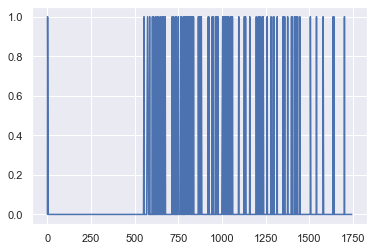

In [11]:
plt.plot(words_found_days.index, words_found_days['mentioned(day)'])

In [30]:
words_found_months = words_found_days.groupby('year_month').agg(func={'mentioned(entry)':'sum', 'month_num':'first', 'year_month':'first', 'mentioned(day)':'sum', 'avg_mentions(month)':'mean'})
words_found_months = words_found_months.sort_values(by='month_num', ascending=True)
words_found_months.head()

,mentioned(entry),month_num,year_month,mentioned(day),avg_mentions(month)
year_month,,,,,
2015 aug,1,0,2015 aug,1,0.142857
2015 sept,0,1,2015 sept,0,0.000000
2015 oct,0,2,2015 oct,0,0.000000
2015 nov,0,3,2015 nov,0,0.000000
2015 dec,0,4,2015 dec,0,0.000000


In [31]:
# plt.plot(words_found_months.index, words_found_months['found_binary'])

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  if __name__ == '__main__':


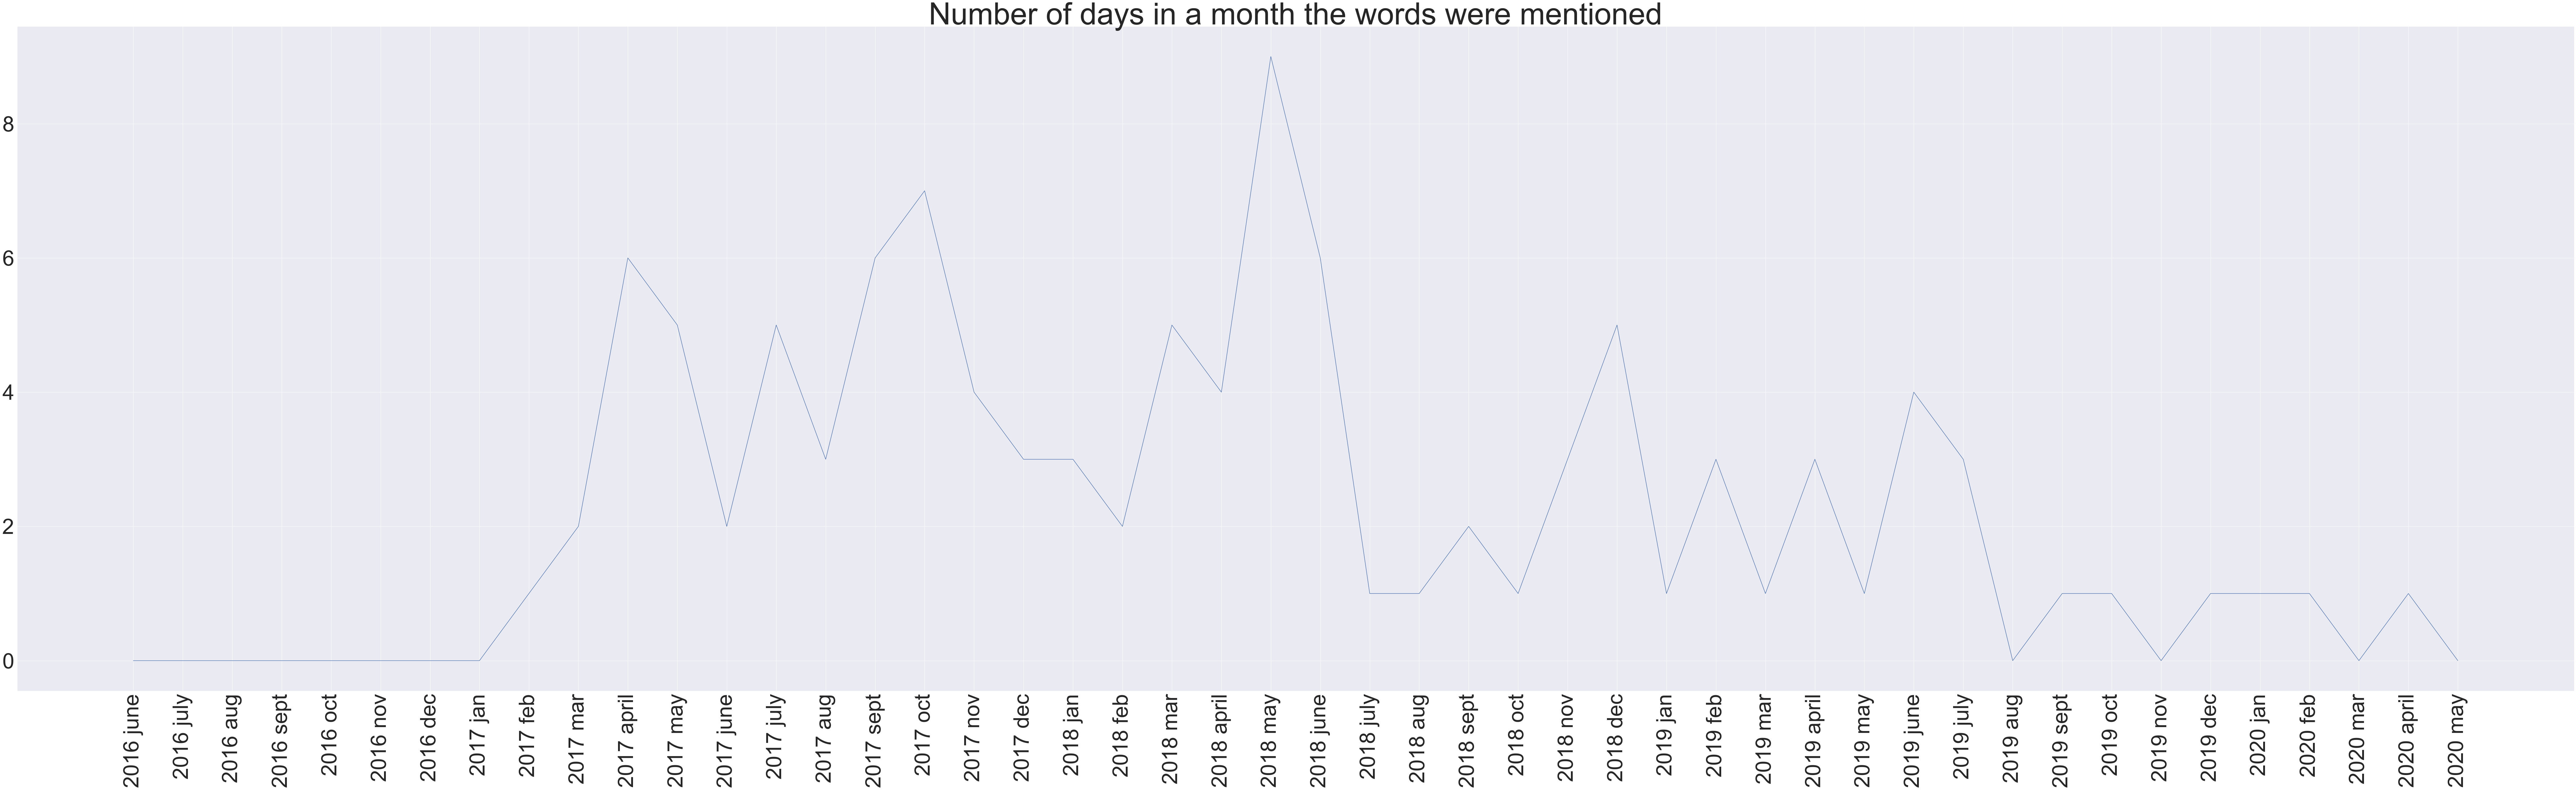

In [45]:
fig, ax = plt.subplots(figsize = (150,40))
# plt.figure(figsize=(100,40))
# plt.xlim([10, 59])
# plt.ylim([-0.5, 10])
ax.plot(words_found_months['mentioned(day)'][10:])
# ax.set_xticklabels(words_found_months['year_month'], rotation=90)
plt.yticks(fontsize=70)
plt.xticks(fontsize=70, rotation=90)
plt.locator_params(axis='x', nbins=20)
plt.title(label='Number of days in a month the words were mentioned', fontsize=100)
# plt.savefig('Figures saved from analyses/Number of Enke Mentions (16May2020).png')

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  """


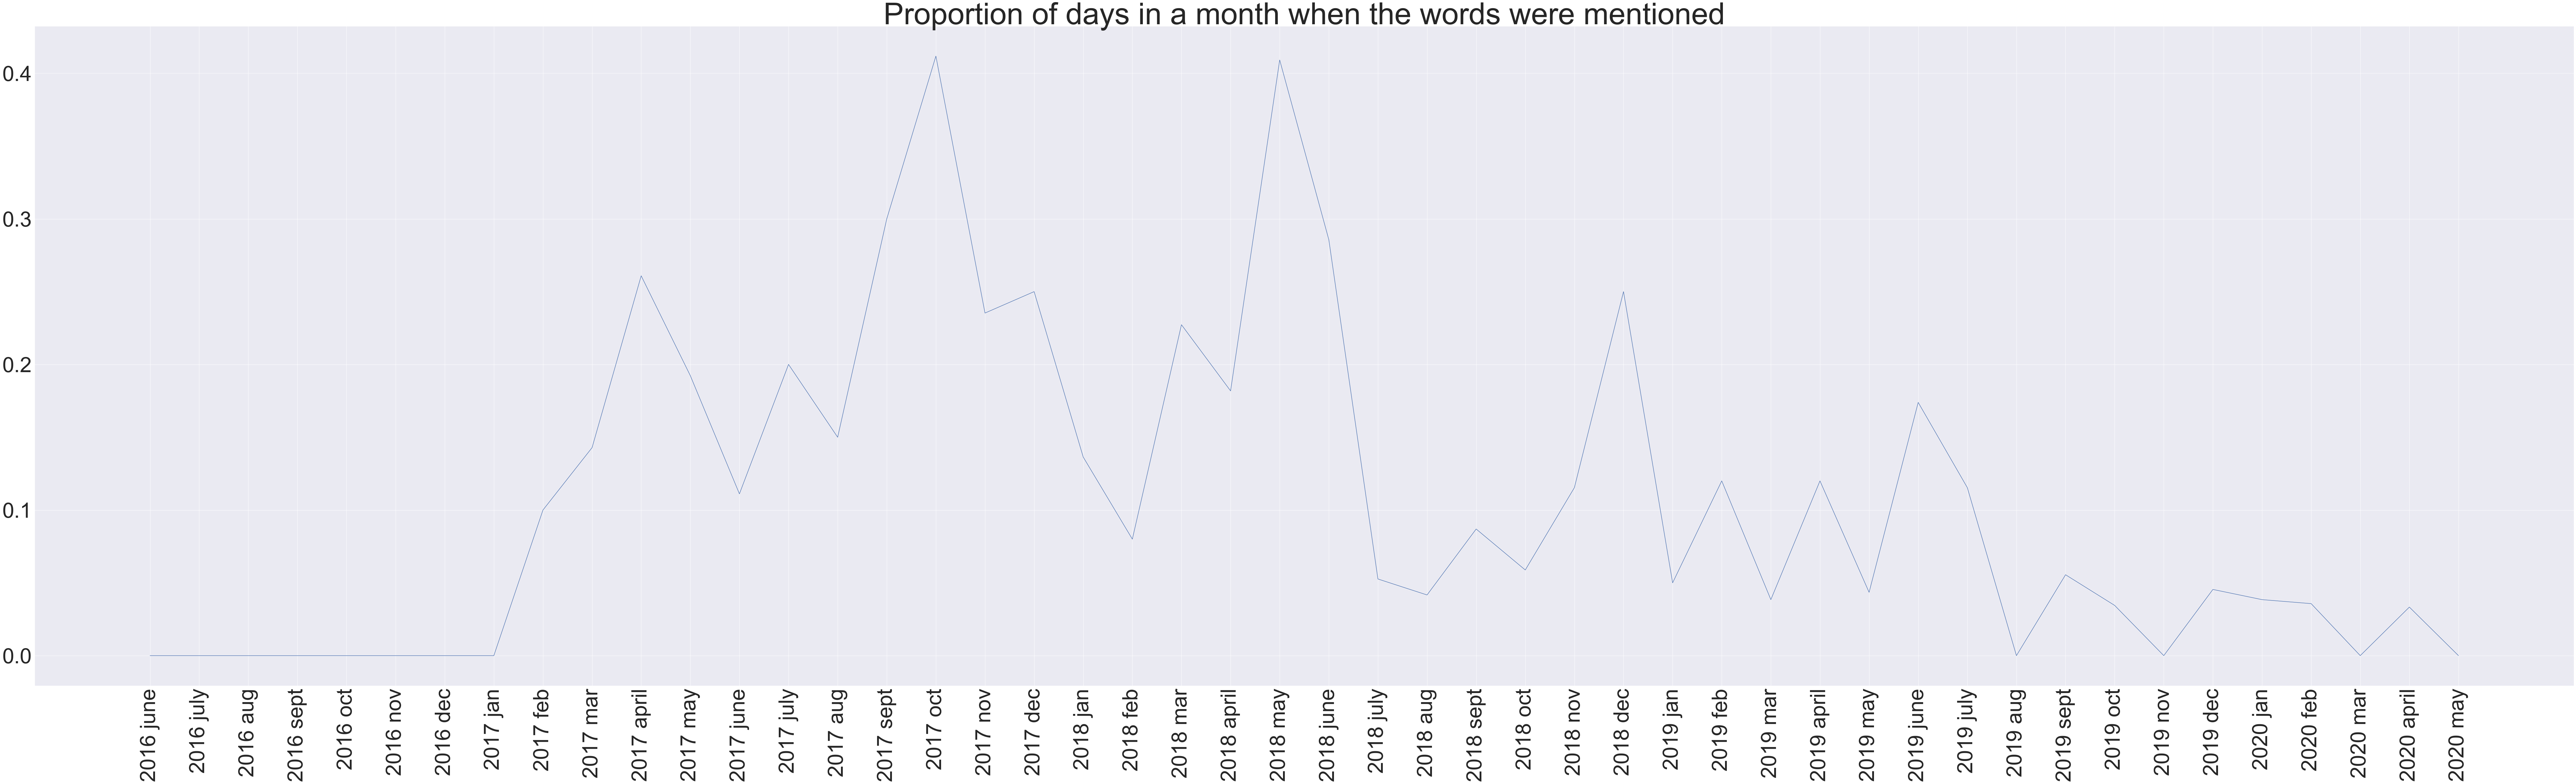

In [48]:
fig, ax = plt.subplots(figsize = (150,40))
ax.plot(words_found_months['avg_mentions(month)'][10:])
plt.xticks(fontsize=70, rotation=90)
plt.yticks(fontsize=70)
plt.locator_params(axis='x', nbins=20)
plt.title(label='Proportion of days in a month when the words were mentioned', fontsize=100)
# plt.savefig('Figures saved from analyses/Proportion of Enke Mentions (16May2020).png')